# 1. 데이터 준비 하기 (Feat. Pandas)
   ## 1.1 실습 도구
       a) 파일 읽어 오기
       b) 파일 모양 확인 하기
       c) 컬럼 선택
       d) 이름 출력
       e) 데이터 관측기 출력 .head()
    
   ## 1.2 샘플데이터

### Ch 0. 판다스 기초
#### 0.1.  쓰기, 저장 (.DataFrame, .to_scv)

In [11]:
import pandas as pd

df = pd.DataFrame({'c':[0,1,2],'c1':[2,3,4],'c2':[33,423,552],'c3':[312421,23424,13241241]}) # 데이터 생성
df.to_csv("test.csv",index=False) #csv 저장, index = False 인덱스 자동설정 기능 off
print(df)
df.to_csv("test1.csv")

   c  c1   c2        c3
0  0   2   33    312421
1  1   3  423     23424
2  2   4  552  13241241


#### 0.2 읽기 (read_csv)



In [17]:
df1=pd.read_csv("test.csv",header=None)
## header(첫행)가 없을 겅우 header=None 옵션 사용할것
df2=pd.read_csv("test1.csv")
print("default header=None")
print(df1)
print ()
print("Default save, Load (header=None)")
print(df2)

default header=None
   0   1    2         3
0  c  c1   c2        c3
1  0   2   33    312421
2  1   3  423     23424
3  2   4  552  13241241

Default save, Load (header=None)
   Unnamed: 0  c  c1   c2        c3
0           0  0   2   33    312421
1           1  1   3  423     23424
2           2  2   4  552  13241241


In [22]:
df3=pd.read_csv("test.csv",index_col='c')
print(df3)
print('\n')
df4=pd.read_csv("test.csv",names=['1열','2열','3열'])
print(df4)

   c1   c2        c3
c                   
0   2   33    312421
1   3  423     23424
2   4  552  13241241


   1열   2열        3열
c  c1   c2        c3
0   2   33    312421
1   3  423     23424
2   4  552  13241241


#### 0.3 엑셀파일 저장, 불러오기

In [25]:
import pandas as pd

data1={'name' : ['준영', '예슬', '지유', '유하'], 'algo' :['a','b','a','a+' ],'bs' :['a','c','c','a+' ], 'py' :['a+','b+','a-','a+' ]}

data2={'c':[0,1,2,2],'c1':[2,3,4,5],'c2':[33,423,552,123],'c3':[312421,23424,1324,241],'c4':[311,234,14,41]}

df1=pd.DataFrame(data1)
df1.set_index('name',inplace=True) # Namde을 index 열 로 설정 

df2=pd.DataFrame(data2)
df2.set_index('c',inplace=True)  # c 를 index로 설정

print(df1)
print()
print(df2)


     algo  bs  py
name             
준영      a   a  a+
예슬      b   c  b+
지유      a   c  a-
유하     a+  a+  a+

   c1   c2      c3   c4
c                      
0   2   33  312421  311
1   3  423   23424  234
2   4  552    1324   14
2   5  123     241   41


In [26]:
## save excel files
writer=pd.ExcelWriter('test_Excel.xlsx')
df1.to_excel(writer,sheet_name='성적')
df2.to_excel(writer,sheet_name='2번시트')
writer.save()

In [38]:
## 시트번호 모를경우
df=pd.ExcelFile("test_Excel.xlsx")
print(df.sheet_names)
## 시트내 데이터 정보 불러오기
df3=pd.read_excel("test_Excel.xlsx",sheet_name='성적')
df3.head()
## 시트내 데이터 정보 불러오기
df3=pd.read_excel("test_Excel.xlsx",sheet_name='2번시트')
df3.head()

['성적', '2번시트']


,c,c1,c2,c3,c4
0,0,2,33,312421,311
1,1,3,423,23424,234
2,2,4,552,1324,14
3,2,5,123,241,41


#### 0.3 json 파일 읽기 ()

json 형태의 파일을 읽어오려면 read_json()함수를 이용해 불러올 수 있다.
json파일 미리보기(이 파일은 웹크롤링이나 로그데이터에서 주로 만나볼 수 있다).

In [ ]:
# 데이터 Reading
# 보스턴주택가격 데이터셋 : https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
import pandas as pd

file_path= 'https://raw.githusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
# C:\00) Researches\05) ML_STUDY\tensorflow1-master\csv\boston.csv

boston=pd.read_csv("C:\00) Researches\05) ML_STUDY\tensorflow1-master\csv\boston.csv",sep="")
print(boston.shape)

# Ch1 보스턴 주택가격 예측

## Ch 1-1 데이터 전처리 (loading and check)

In [12]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics


# 데이터 소개
# http://dator.co.kr/?vid=ctg258&mid=textyle&document_srl=1721307 

#x
#506 행 13 열 
#CRIM     per capita crime rate by town
#ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS    proportion of non-retail business acres per town
#CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX      nitric oxides concentration (parts per 10 million)
#RM       average number of rooms per dwelling
#AGE      proportion of owner-occupied units built prior to 1940
#DIS      weighted distances to five Boston employment centres
#RAD      index of accessibility to radial highways
#TAX      full-value property-tax rate per $10,000
#PTRATIO  pupil-teacher ratio by town
#B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT    % lower status of the population

#y
#506 행 1 열
#target (MEDV)     Median value of owner-occupied homes in $1000's (본인소유 주책가격)

dataset = datasets.load_boston()
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)  # 데이터 프레임 생성
print(df.shape)

(506, 13)


c:\Users\poker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [13]:
df['target']=dataset.target # 데이터 예측값 target (y)
#print(df.head())    # 데이터 Fame 처음 n줄 데이터 출력, vs tail(self,n=5) 마지막 n줄
print(df.shape)     # 데이터 구조 출력


print(df.describe)  # 통계량 요약


(506, 14)
<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396

In [15]:
df.describe()  # 통계량 요약

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
x_data=dataset.data
y_data=dataset.target
print(y_data.shape)
print(x_data.shape)

(506,)
(506, 13)


### ch 1-2 선형회귀

In [ ]:
import numpy as np
import pandas as pd

from sklearn  import model_selection
from sklearn.linear_model import LinearRegression
from sklearn  import datasets
from sklearn  import metrics

dataset=datasets.load_boston()
x_data=dataset.data
y_data=dataset.target

In [39]:
## 학습, 테스트 데이터 분할
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,test_size=0.5)
## 추가상식 !! : float == 부동소수점 int == 16비트 정수 char 8==비트 정수 long long ==32비트 정수
#               double == 실수형                

# arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
# random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 - 목적 난수를 제현가능하도록 함 (int나 RandomState로 입력)
# shuffle : 셔플(랜덤추출)여부설정 (default = True) : 순차적 추출이 아닐경우 (=False)
# stratify : 지정한 Data의 비율을 유지한다 (Classification을 적용할경우?). 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

# ref : 랜덤 데이터셋 분할하기, https://rfriend.tistory.com/519
estimator = LinearRegression()
estimator . fit(x_train,y_train)
y_predict=estimator.predict(x_train)
score=metrics.r2_score(y_train,y_predict)
## r2_score 란 ?? https://go-hard.tistory.com/125
## 예측 모델과 실제 모델이 얼마나 관한 상관성을 가지고 있는지 ... 여기서 실제모델은 실제값을 의미




print('The score is ', score ,'%')
y_predict_test=estimator.predict(x_test)
score_test=metrics.r2_score(y_test,y_predict_test)
print('The score(test) is ', score_test ,'%')

The score is  0.7517218876371906 %
The score(test) is  0.7064955146206844 %


### 선형회귀 고찰
#####       - refer) Linear regrestion으로 추출된 예측값의 r2 가 0.7 수준을 넘지 못하고 있음
#####       - Hyper parameter : test size, 조정을 통해서 적합한 파라메터 산출이 중요할것으로 생각됨
#####       - Overfitting 등의 문제 해결이 필요 할것으로 생각됨 (좀더 내용을 생각을 해보자)

### Ch 1-3. K- 최근접이웃 

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
# sklearn import

from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV  # GridSearch method 를사용
from sklearn import metrics

dataset= datasets.load_boston()
x_data=dataset.data
y_data=dataset.target


x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,test_size=0.3)

## 최근접 모델 생성

estimator=KNeighborsRegressor(n_neighbors=5, metric='minkowski',weights='uniform')

estimator.fit(x_train,y_train) # parameter fiting

y_predict=estimator.predict(x_train)
score = metrics.r2_score(y_train,y_predict)
print(score)

y_predict_test=estimator.predict(x_test)
score_test=metrics.r2_score(y_test,y_predict_test)
print(score_test)


0.6771981106794167
0.571705554861488


c:\Users\poker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

#### (고찰)
#### 
#### R2 socore가 선형회긔모델 대비 감소 (선형회귀 : 0.7 , k-nearist : 0.5)
#### Hyper parameter setting이 중요. ( GridsearchCV 사용)

In [4]:
## Hyper parameter tunning
## Ref) https://dacon.io/codeshare/4568?page&dtype&ptype
## Ref) GridSearchCV
# GridSearchCV 의 인자들
# estimator : 보통 알고리즘을 객체로 만들어 넣어준다.
# param_grid : 튜닝을 위한 대상 파라미터, 사용될 파라미터를 딕셔너리 형태로 넣어준다.
# scoring : 예측 성능을 측정할 평가 방법을 넣는다. 분류 알고리즘일 때는, 'accuracy', 'f1', 회귀 알고리즘일 때는 'neg_mean_squared_error', 'r2' 등을 넣을 수 있다.
# cv : 교차 검증에서 몇개로 분할되는지 지정한다.(정수로 넣어주면 K겹 교차검증이 되고, KFold(k) 이런식으로 넣어주어도 무방 // default 값은 cv=3)
# refit : True로 하면 최적의 하이퍼 파라미터를 찾아서 estimator를 재학습시킨다. (default 값이 True임)
## Print Hyperparameters
print('\n KNN Hyperparameteres:\n',estimator.get_params())

## parameter pull setup
param_grid = {'n_neighbors':[5,1,2,3,4], 
                   'metric':['minkowski','manhattan','euclidean'], 
                   'weights':['uniform','distance']}

grid_search=GridSearchCV(estimator,param_grid=param_grid,cv=20,scoring='r2')
grid_search.fit(x_train,y_train)                      # train data를 이용하여 parameter searching 
print('best parameters : ',grid_search.best_params_)
print('besst score :',grid_search.best_score_)
#print('\nDecisionTreeClassifier 하이퍼 파라미터:\n', dt_clf.get_params())



 KNN Hyperparameteres:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
best parameters :  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
besst score : 0.5438930803743782


In [6]:
grid_search.fit(x_train, y_train)
y_predict_BSpar= grid_search.predict(x_test) 
score_BSpar= metrics.r2_score(y_test, y_predict_BSpar)
print('r2 score (best paramters): ', score)

r2 score (best paramters):  0.6771981106794167


### Ch 1-3 라쏘회귀모델

In [10]:
import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

dataset=datasets.load_boston()
x_data=dataset.data
y_data=dataset.target

x_train,x_test,y_train,y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)


c:\Users\poker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [7]:

## model generation (Lasso)

estimator=Lasso(alpha=1.0)
estimator.fit(x_train, y_train)

y_predict=estimator.predict(x_train)
score=metrics.r2_score(y_train, y_predict)

print('r2 score is ',score)

y_predict_test=estimator.predict(x_test)
score_test=metrics.r2_score(y_test,y_predict_test)
print('r2 score(test) is ', score_test)

r2 score is  0.724596714446834
r2 score(test) is  0.5912378664673297


In [8]:
## Hyperparameter tunning for Lasso model
# Lasso Hyperparameter
#


print('\n Lasso Hyperparameteres:\n',estimator.get_params())


param_grid = {'n_neighbors':[5,1,2,3,4], 
                   'metric':['minkowski','manhattan','euclidean'], 
                   'weights':['uniform','distance']}


grid_search=GridSearchCV(estimator,param_grid=param_grid,cv=20,scoring='r2')
grid_search.fit(x_train,y_train)                      # train data를 이용하여 parameter searching 
print('best parameters : ',grid_search.best_params_)
print('besst score :',grid_search.best_score_)



 Lasso Hyperparameteres:
 {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [12]:
param_grids = {'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}
grid_search=GridSearchCV(estimator,param_grid=param_grids)
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

estimator=grid_search.best_estimator_
print(np.mean(model_selection.cross_val_score(estimator, x_test, y_test, scoring='r2')))



c:\Users\poker\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\poker\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\poker\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.956e+03, tolerance: 2.181e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

0.6674958731530952
{'alpha': 0}
0.6822074403096812


c:\Users\poker\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\poker\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+03, tolerance: 1.153e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\poker\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit

In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
#
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn import metrics

from sklearn import datasets
dataset = datasets.load_boston()
x_data = dataset.data
y_data = dataset.target
#print(x_data.shape) #(506, 13)
#print(y_data.shape) #(506,)

####################

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

estimator = Ridge(alpha=1.0)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.7475724355889719
0.6968750973873042


c:\Users\poker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [39]:
# 

import numpy as np
import pandas as pd
#
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn import datasets

import matplotlib.pyplot as plt

dataset = datasets.load_boston()
x_data = dataset.data
y_data = dataset.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

estimator = LinearRegression()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
y_predict = estimator.predict(x_test) 
score_single= metrics.r2_score(y_test, y_predict)
print('r2 single : ',score) #1.0

##############################################################################################

poly = PolynomialFeatures(degree=2)
poly.fit(x_data)
x_data_poly = poly.transform(x_data)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data_poly, y_data, test_size=0.3)
estimator = LinearRegression()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print('r2 polynormal(2) : ', score) #1.0

###############################################################################################
poly = PolynomialFeatures(degree=2) 
poly.fit(x_data)
x_data_poly = poly.transform(x_data)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data_poly, y_data, test_size=0.3)
estimator = Lasso(alpha=1)
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print('r2 polynormal(2,Lasso_train) : ', score) #1.0
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict) 
print('r2 polynormal(2,Lasso) : ', score) # overfiting 문제가 발생 한것으로 생각됨

r2 single :  0.7718862853410733
r2 polynormal(2) :  -339.2974227956483
r2 polynormal(2,Lasso_train) :  0.9568466806909959
r2 polynormal(2,Lasso) :  0.8062271318928882


c:\Users\poker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

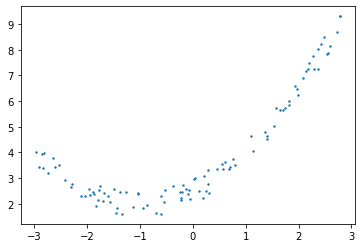

In [54]:
# ref) 다항회귀 https://inuplace.tistory.com/515

import numpy as np
import matplotlib.pyplot as plt

n=100
x= 6*np.random.rand(n,1)-3
y= 0.5*x**2+x+2 + np.random.rand(n,1)

plt.scatter(x,y,s=2)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
# degree = 옵션 차수
# include_bias=True 0 차항도 생성
x_poly  = poly_features.fit_transform(x)
# fit_transform을 통해 새로운 데이터 형태로 변환

print (x[0], x_poly[0])

[0.48590331] [0.48590331 0.23610203]


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

model=LinearRegression()
model.fit(x_poly,y)

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인 (모델 생성을 위한 단순화.... sklearn)
from sklearn.pipeline import make_pipeline   

model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_) # model 형태 확인

model_lr2 = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                         Lasso(alpha=0.5))
model_lr2.fit(x, y)

[[1.00453527 0.49026988]]


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(alpha=0.5))])

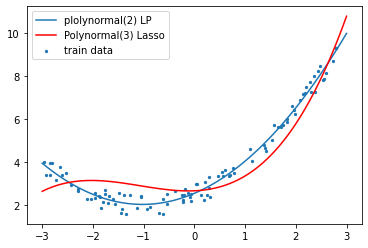

In [66]:
# 다항 회귀 그래프 
from cProfile import label


xx=np.linspace(-3,3,100)
# print(xx.shape)
# np.newaxis 차원확장
# print(xx[:,np.newaxis])
y_pred=model_lr.predict(xx[:,np.newaxis])
y_pred2=model_lr2.predict(xx[:,np.newaxis])
plt.plot(xx,y_pred,label="plolynormal(2) LP")
plt.plot(xx,y_pred2,'r',label='Polynormal(3) Lasso')
plt.scatter(x,y, s=5,label='train data')
plt.legend()